In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.tools.visualization import plot_histogram

In [42]:
distances = {
    "32": 3,
    "31": 2,
    "30": 4,
    "21": 7,
    "20": 6,
    "10": 5,
}

def dist_single(qr, qr_target):
    qc = QuantumCircuit(qr, qr_target)
    
    for edge in distances:
        if edge[0] == '3':
            node = format(int(edge[1]), 'b')
            d_bin = format(distances[edge], 'b')
            
            for idx in range(len(node)):
                if node[idx] == '0':
                    qc.x(qr[idx])
            
            for idx in range(len(d_bin)):
                if d_bin[idx] == '1':
                    qc.ccx(qr[0], qr[1], qr_target)
            
            for idx in range(len(node)):
                if node[idx] == '0':
                    qc.x(qr[idx])
    
    return qc

def dist(qr1, qr2, qr_target, qr_anc):
    qc = QuantumCircuit(qr1, qr2, qr_target, qr_anc)
    
    for edge in distances:
        if edge[0] != '3':
            # convert to binaries
            node1 = format(int(edge[0]), 'b')
            node2 = format(int(edge[1]), 'b')
            d_bin = format(distances[edge], 'b')

            for idx in range(len(node1)): # assume node1 and node2 have the same length
                if node1[idx] == '0':
                    qc.x(qr1[idx])
                    
            for idx in range(len(node2)):
                if node2[idx] == '0':
                    qc.x(qr2[idx])

            for idx in range(len(d_bin)):
                if d_bin[idx] == '1':
                    qc.mct(qr1[:]+qr2[:], qr_target[idx], qr_anc)
                    
            for idx in range(len(node2)): # invert back
                if node2[idx] == '0':
                    qc.x(qr2[idx])

            for idx in range(len(node1)):
                if node1[idx] == '0':
                    qc.x(qr1[idx])
                
    return qc

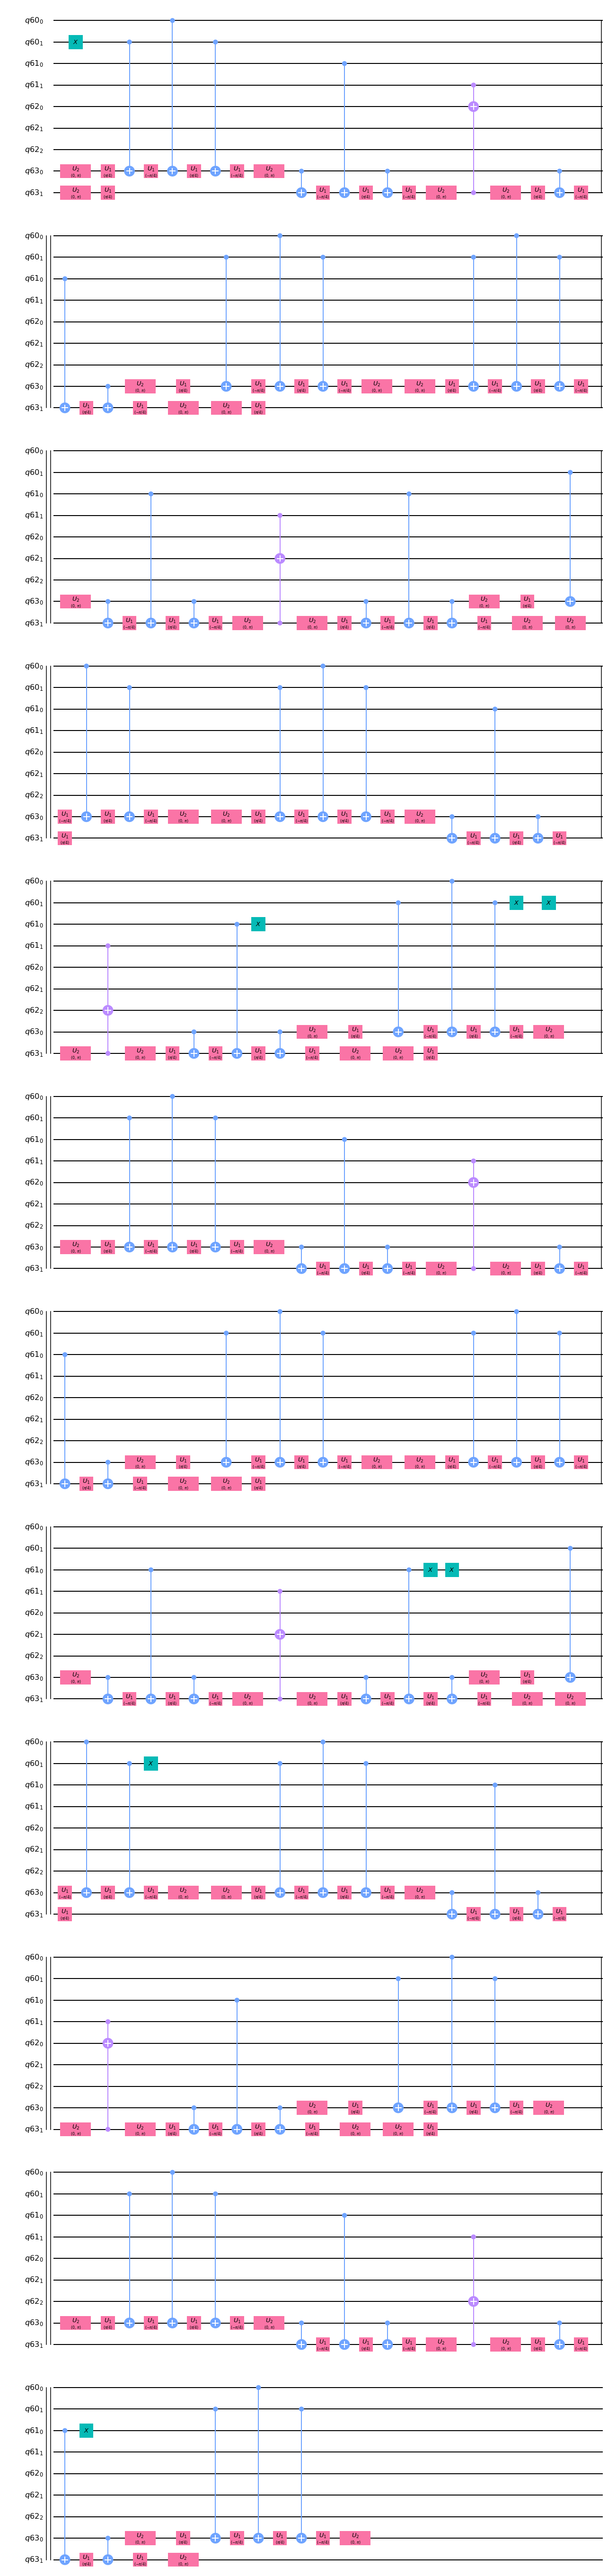

In [44]:
qr1 = QuantumRegister(2) # node reg.
qr2 = QuantumRegister(2) # node reg.
qr_target = QuantumRegister(3) # distance reg.
qr_anc = QuantumRegister(2)
qc = QuantumCircuit(qr1, qr2, qr_target, qr_anc)

qc = qc + dist(qr1, qr2, qr_target, qr_anc)

qc.draw(output='mpl')